# Problem Statement

The NFL is a multi-billion-dollar industry with a global fan base exceeding 100 million. As one of the most lucrative sports leagues, the NFL generates revenue from broadcast deals, sponsorships, merchandise, and ticket sales. Amid this financial landscape, player contracts have reached unprecedented heights, with some athletes signing deals approaching $500 million. These figures underscore the critical need for data-driven decision-making to evaluate and maximize player value.
Player Performance Prediction
Injury Prevention
Game Strategy
Fan Engagement
Fantasy Football
Predictive Analytics
Engagement and Revenue Generation

Our project objective was to answer three questions a team would most likely gather on their players from the data:

When are players usually playing in their prime based on the trajectory of similar players?

How well do advanced metrics and standard performance metrics predict a player's fantasy points?

How long on average can players be considered 'Tier 1'?

# Data Collection

Player_stats.csv - pulled from Github - https://github.com/nflverse/nflverse-data/tree/main?tab=readme-ov-file
Data consists of all NFL player stats from 1999 to 2024
There are 131,838 records and 53 fields
Each record represents a player’s stat line for each week of their career 

# Problem 1

This problem is a supervised machine learning classification problem. The goal is to predict whether a football player is in their prime or not based on various performance metrics such as passing yards, rushing yards, and receiving yards. A Random Forest Classifier was chosen for this task because:
	1.	Random Forests Handle Nonlinear Relationships: Player performance metrics may interact in complex, nonlinear ways. Random forests excel at capturing such interactions through an ensemble of decision trees.
	2.	Feature Importance: Random forests provide insights into the importance of different features (e.g., passing yards, fantasy points) in predicting a player’s prime years. This is valuable for understanding the drivers of player performance.
	3.	Robustness: Random forests are robust to overfitting, especially with smaller datasets, because they average multiple decision trees.
	4.	Interpretability: The feature importance analysis helps stakeholders understand which factors contribute most to a player’s performance classification.

The problem involves binary classification (prime vs. not prime), which aligns well with the Random Forest Classifier’s capabilities to handle tabular data and categorical outputs effectively.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [5]:
# Load the dataset
player_stats = pd.read_csv('player_stats.csv') 

In [53]:
player_stats.tail()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,total_seasons_played,prime
131833,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,4,REG,...,0,NaN,NaN,NaN,NaN,0,5.0,5.0,1,0
131834,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,6,REG,...,0,NaN,NaN,NaN,NaN,0,2.6,2.6,1,0
131835,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,8,REG,...,0,NaN,NaN,NaN,NaN,0,1.0,1.0,1,0
131836,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,9,REG,...,0,4.500,0.052632,0.031008,0.100653,0,11.5,12.5,1,1
131837,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,0,-3.125,0.083333,-0.072072,0.074550,0,8.7,10.7,1,0


In [7]:
print(player_stats.describe())

              season           week    completions       attempts  \
count  131838.000000  131838.000000  131838.000000  131838.000000   
mean     2011.639679       9.485186       2.162442       3.512007   
std         7.397213       5.306200       6.504414      10.401376   
min      1999.000000       1.000000       0.000000       0.000000   
25%      2005.000000       5.000000       0.000000       0.000000   
50%      2012.000000      10.000000       0.000000       0.000000   
75%      2018.000000      14.000000       0.000000       0.000000   
max      2024.000000      22.000000      47.000000      68.000000   

       passing_yards    passing_tds  interceptions          sacks  \
count  131838.000000  131838.000000  131838.000000  131838.000000   
mean       24.641173       0.149843       0.096474       0.241251   
std        74.918040       0.566068       0.421189       0.876962   
min       -16.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

     player_id  total_seasons_played
0   00-0000003                     2
13  00-0000007                     5
17  00-0000104                     2
32  00-0000145                     4
48  00-0000166                     8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21040
           1       1.00      1.00      1.00      5328

    accuracy                           1.00     26368
   macro avg       1.00      1.00      1.00     26368
weighted avg       1.00      1.00      1.00     26368

Accuracy: 1.0


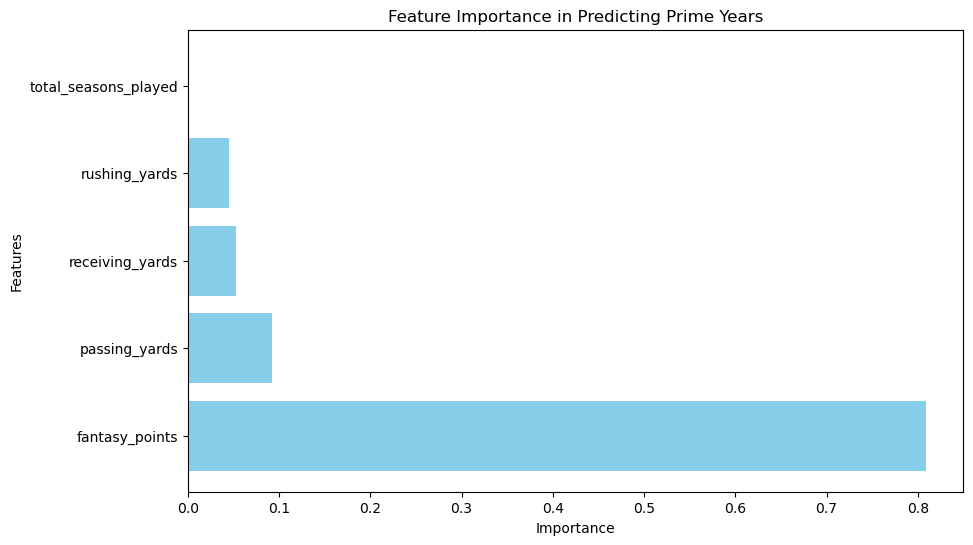

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
player_stats = pd.read_csv('player_stats.csv')

# Step 1: Load your dataset
player_stats = pd.read_csv('player_stats.csv')  # Ensure the correct path to the CSV file

# Step 2: Calculate total_seasons_played
player_seasons_count = player_stats.groupby('player_id').agg(total_seasons_played=('season', 'nunique'))
player_stats = player_stats.merge(player_seasons_count, on='player_id', how='left')

# Verify that the column is correctly added
print(player_stats[['player_id', 'total_seasons_played']].drop_duplicates().head())

# Step 3: Define the threshold for 'prime' based on the top 20% of fantasy_points
threshold = player_stats['fantasy_points'].quantile(0.8)  # Top 20% threshold
player_stats['prime'] = (player_stats['fantasy_points'] >= threshold).astype(int)

# Step 4: Select features for the model
selected_features = [
    'total_seasons_played', 'fantasy_points', 'passing_yards', 
    'rushing_yards', 'receiving_yards'
]

# Step 5: Filter the dataset to include selected features and drop missing values
filtered_data = player_stats[selected_features + ['prime']].dropna()

# Step 6: Prepare the data for training and testing
X = filtered_data[selected_features]
y = filtered_data['prime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 9: Analyze feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importance in Predicting Prime Years')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [91]:
# Function to predict if a specific player will be in their prime
def predict_prime_status(player_id, player_stats, rf_model, selected_features):
    # Filter data for the specific player
    player_data = player_stats[player_stats['player_id'] == player_id]
    
    if player_data.empty:
        print(f"No data available for player ID: {player_id}")
        return

    # Retrieve the player's display name from the dataset
    player_name = player_data.iloc[0]['player_display_name'] 
    # Select the latest available data for prediction
    latest_data = player_data.iloc[-1] 
    latest_features = latest_data[selected_features].values.reshape(1, -1) 
    # Make the prediction
    prime_probability = rf_model.predict_proba(latest_features)[:, 1][0] 
    is_prime = rf_model.predict(latest_features)[0]  
    
    # Output the results
    print(f"Prime Probability for {player_name} (ID: {player_id}): {prime_probability:.2f}")
    print(f"Prediction: {'Yes' if is_prime == 1 else 'No'}")

player_id_to_check = "00-0034796"
predict_prime_status(player_id_to_check, player_stats, rf_model, selected_features)

Prime Probability for Lamar Jackson (ID: 00-0034796): 1.00
Prediction: Yes


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
print("Columns in player_stats:", player_stats.columns)

Columns in player_stats: Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_te

In [8]:
threshold = player_stats['fantasy_points'].quantile(0.8)
player_stats['prime'] = (player_stats['fantasy_points'] >= threshold).astype(int)

In [9]:
# Group data by position and calculate the average prime classification
position_prime_analysis = player_stats.groupby('position').agg(
    avg_prime_indicator=('prime', 'mean')  # Average of binary prime classification
).reset_index()

# Preview the results
print(position_prime_analysis)

   position  avg_prime_indicator
0         C             0.000000
1        CB             0.006757
2        DB             0.008403
3        DE             0.000000
4        DL             0.000000
5        DT             0.000000
6        FB             0.024990
7        FS             0.010638
8         G             0.016393
9        HB             0.000000
10      ILB             0.000000
11        K             0.000000
12       LB             0.000000
13       LS             0.000000
14      MLB             0.000000
15       NT             0.000000
16       OG             0.000000
17       OL             0.000000
18      OLB             0.026316
19       OT             0.000000
20        P             0.002151
21       QB             0.537045
22       RB             0.227803
23        S             0.000000
24       SS             0.025000
25        T             0.000000
26       TE             0.067007
27       WR             0.159495


In [10]:
# Calculate the average season when players are classified as prime by position
prime_season_analysis = player_stats[player_stats['prime'] == 1].groupby('position').agg(
    avg_prime_season=('total_seasons_played', 'mean')  # Average total seasons played
).reset_index()

# Remove positions with no prime players
prime_season_analysis = prime_season_analysis.dropna()

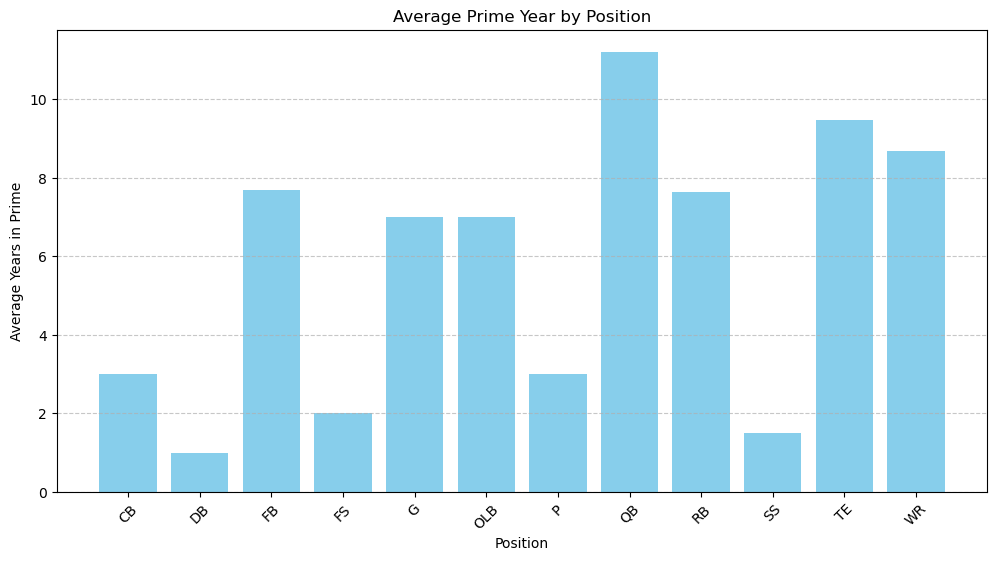

In [11]:
import matplotlib.pyplot as plt
# Plot the average prime season by position
plt.figure(figsize=(12, 6))
plt.bar(prime_season_analysis['position'], prime_season_analysis['avg_prime_season'], color='skyblue')
plt.title('Average Prime Year by Position')
plt.xlabel('Position')
plt.ylabel('Average Years in Prime')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

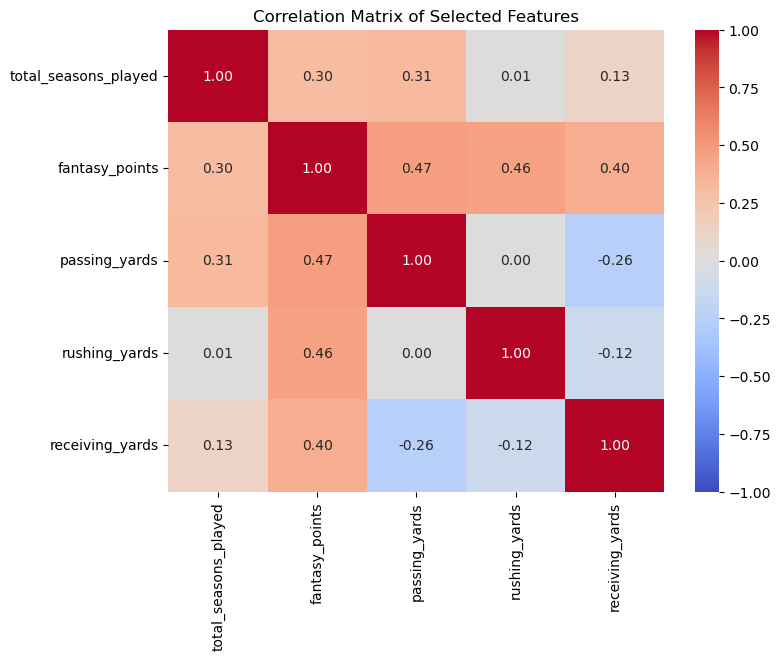

Key Insights from Correlation Analysis:
total_seasons_played shows strongest correlation with passing_yards (0.31).
fantasy_points shows strongest correlation with passing_yards (0.47).
passing_yards shows strongest correlation with fantasy_points (0.47).
rushing_yards shows strongest correlation with fantasy_points (0.46).
receiving_yards shows strongest correlation with fantasy_points (0.40).


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of relevant numeric features
correlation_features = ['total_seasons_played', 'fantasy_points', 'passing_yards', 'rushing_yards', 'receiving_yards']

# Check if all required features exist in the dataset
missing_features = [feature for feature in correlation_features if feature not in player_stats.columns]
if missing_features:
    print(f"Missing Features: {missing_features}")
else:
    # Compute correlation matrix
    correlation_matrix = player_stats[correlation_features].corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Matrix of Selected Features")
    plt.show()

    # Print key insights
    print("Key Insights from Correlation Analysis:")
    for col in correlation_matrix.columns:
        strongest_corr = correlation_matrix[col].drop(labels=[col]).idxmax()  # Exclude self-correlation
        strongest_value = correlation_matrix[col].drop(labels=[col]).max()
        print(f"{col} shows strongest correlation with {strongest_corr} ({strongest_value:.2f}).")

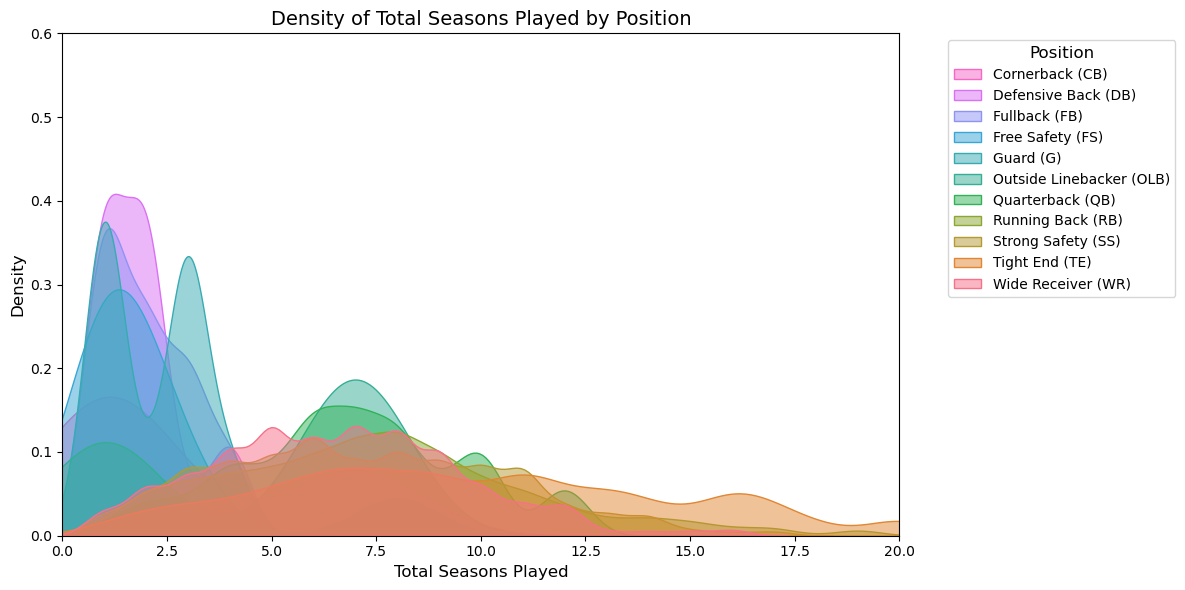

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for relevant positions and limit total seasons to 20
relevant_positions = ['CB', 'DB', 'FB', 'FS', 'G', 'OLB', 'QB', 'RB', 'SS', 'TE', 'WR']
filtered_prime_players = player_stats[
    (player_stats['position'].isin(relevant_positions)) &
    (player_stats['total_seasons_played'] <= 20)  # Limit to 20 seasons
]

# Set up the figure
plt.figure(figsize=(12, 6))

# Create the density plot
sns.kdeplot(
    data=filtered_prime_players,
    x='total_seasons_played',
    hue='position',
    fill=True,
    common_norm=False,  # Normalize each position independently
    alpha=0.5,
    bw_adjust=1.2  # Adjust bandwidth for smoother curves
)

# Add title and labels
plt.title('Density of Total Seasons Played by Position', fontsize=14)
plt.xlabel('Total Seasons Played', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Limit the y-axis to 0.6 and the x-axis to 20 seasons
plt.ylim(0, 0.6)
plt.xlim(0, 20)

# Add a manual legend
plt.legend(
    labels=['Cornerback (CB)', 'Defensive Back (DB)', 'Fullback (FB)', 'Free Safety (FS)', 'Guard (G)',
            'Outside Linebacker (OLB)', 'Quarterback (QB)', 'Running Back (RB)', 'Strong Safety (SS)',
            'Tight End (TE)', 'Wide Receiver (WR)'],
    title='Position',
    bbox_to_anchor=(1.05, 1),  # Place legend outside the plot
    loc='upper left',
    fontsize=10,
    title_fontsize=12
)

# Improve layout for better visualization
plt.tight_layout()
plt.show()

Practical Explanation

Understanding when players are in their prime has significant implications for sports analytics, team management, and business strategy:
	1.	Team Management:
	•	Teams can use these insights to make informed decisions about contract negotiations, player acquisitions, and trades.
	•	Coaches and analysts can tailor training programs to maximize a player’s performance during their prime.
	2.	Sports Analytics:
	•	Identifying the prime years of players helps analysts predict future performance and compare players across positions.
	•	It provides benchmarks for scouting and evaluating incoming players based on historical trends.
	3.	Fan Engagement:
	•	Fans and fantasy sports participants benefit from understanding prime years, which improves their strategies in fantasy leagues.
	•	Media organizations can generate engaging content based on predictions and performance trends.
	4.	Economic Impact:
	•	For sponsors and advertisers, predicting a player’s prime years helps align marketing efforts with peak performance periods.
	•	Teams can optimize revenue by leveraging peak player performances for ticket sales and merchandise.
	5.	Technology and Data Science Advancement:
	•	This use case demonstrates how machine learning can be applied to sports analytics, paving the way for further innovations in sports technologies.

# Problem 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import r2_score
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import string
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



C:\Users\melak\AppData\Local\Temp\ipykernel_1047420\3572398695.py:29: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv(r"C:\Users\melak\Documents\IMT574 A\Final Project\player_stats.csv")

In [3]:
df.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,1,REG,...,0,0.292378,0,0.0,0.052632,NaN,NaN,0,12.7,13.7
1,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,2,REG,...,1,0.377009,0,0.0,0.117647,NaN,NaN,0,5.1,8.1
2,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,4,REG,...,0,-0.699578,0,NaN,0.023810,NaN,NaN,0,0.2,0.2
3,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,7,REG,...,0,-0.228454,0,0.0,0.050000,NaN,NaN,0,3.5,5.5
4,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,8,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,3.9,3.9


In [4]:
df.dtypes

player_id                       object
player_name                     object
player_display_name             object
position                        object
position_group                  object
headshot_url                    object
recent_team                     object
season                           int64
week                             int64
season_type                     object
opponent_team                   object
completions                      int64
attempts                         int64
passing_yards                    int64
passing_tds                      int64
interceptions                    int64
sacks                            int64
sack_yards                       int64
sack_fumbles                     int64
sack_fumbles_lost                int64
passing_air_yards                int64
passing_yards_after_catch        int64
passing_first_downs              int64
passing_epa                    float64
passing_2pt_conversions          int64
pacr                     

In [5]:
# Resetting index
#df.reset_index(drop=True, inplace=True)

# Dropping the first row using its index (0)
df = df.drop(0)

df.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
1,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,2,REG,...,1,0.377009,0,0.0,0.117647,NaN,NaN,0,5.1,8.1
2,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,4,REG,...,0,-0.699578,0,NaN,0.023810,NaN,NaN,0,0.2,0.2
3,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,7,REG,...,0,-0.228454,0,0.0,0.050000,NaN,NaN,0,3.5,5.5
4,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,8,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,3.9,3.9
5,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,9,REG,...,0,-1.110694,0,0.0,0.062500,NaN,NaN,0,2.5,3.5


In [6]:
# Ensuring there are no NaN or infinite values after conversion
print(df.isnull().sum())  # Checking for any missing values
print(df.describe())      # Checking if the data contains valid values (e.g., no zeros or NaNs)
df.dtypes

player_id                           0
player_name                     67379
player_display_name                 3
position                           72
position_group                     72
headshot_url                    59091
recent_team                         0
season                              0
week                                0
season_type                         0
opponent_team                       0
completions                         0
attempts                            0
passing_yards                       0
passing_tds                         0
interceptions                       0
sacks                               0
sack_yards                          0
sack_fumbles                        0
sack_fumbles_lost                   0
passing_air_yards                   0
passing_yards_after_catch           0
passing_first_downs                 0
passing_epa                    114998
passing_2pt_conversions             0
pacr                           115441
dakota      

player_id                       object
player_name                     object
player_display_name             object
position                        object
position_group                  object
headshot_url                    object
recent_team                     object
season                           int64
week                             int64
season_type                     object
opponent_team                   object
completions                      int64
attempts                         int64
passing_yards                    int64
passing_tds                      int64
interceptions                    int64
sacks                            int64
sack_yards                       int64
sack_fumbles                     int64
sack_fumbles_lost                int64
passing_air_yards                int64
passing_yards_after_catch        int64
passing_first_downs              int64
passing_epa                    float64
passing_2pt_conversions          int64
pacr                     

In [7]:
# Dropping non-essential columns with excessive missing values
df = df.drop(columns=['player_name', 'headshot_url', 'dakota'])

# Imputing missing values for numeric columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[["passing_epa", "rushing_epa", "receiving_epa", "racr", "target_share", "wopr"]] = imputer.fit_transform(
    df[["passing_epa", "rushing_epa", "receiving_epa", "racr", "target_share", "wopr"]])


In [8]:
# Selecting relevant features (independent variables) for regression
features = [
    'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 
    'carries', 'rushing_yards', 'rushing_tds', 
    'receptions', 'targets', 'receiving_yards', 'receiving_tds', 
    'passing_epa', 'rushing_epa', 'receiving_epa', 
    'pacr', 'racr', 'wopr', 'target_share', 'air_yards_share'
]

# Dependent variable (target)
target = 'fantasy_points'

# Filtering out rows with missing values in selected columns
df = df[features + [target]].dropna()

# Defining the independent variables (X) and dependent variable (y)
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features to normalize the scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = reg_model.predict(X_test_scaled)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Displaying the coefficients for each feature
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': reg_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

Model Performance:
Mean Squared Error (MSE): 0.55
R-squared (R²): 0.99

Feature Importance (Coefficients):
            Feature   Coefficient
18     target_share  1.408661e+12
19  air_yards_share  1.026918e+12
10  receiving_yards  3.991107e+00
2     passing_yards  3.657587e+00
3       passing_tds  2.950135e+00
7       rushing_tds  2.887325e+00
11    receiving_tds  2.877921e+00
6     rushing_yards  2.741893e+00
1          attempts  4.782451e-01
12      passing_epa  2.970046e-01
5           carries  2.809861e-01
13      rushing_epa  2.519653e-01
14    receiving_epa  7.213224e-02
9           targets  2.205153e-02
8        receptions  8.434908e-03
16             racr  9.159622e-04
15             pacr -3.800941e-02
0       completions -2.481137e-01
4     interceptions -9.675031e-01
17             wopr -2.282843e+12


The regression model demonstrates that advanced metrics and standard performance metrics collectively predict a player's fantasy points extremely well. The model's performance metrics, including a low Mean Squared Error (MSE) of 0.55 and an R-squared value of 0.99, indicate that 99% of the variance in fantasy points is explained by the selected features. Advanced metrics such as target_share and air_yards_share have the largest positive coefficients, suggesting they play a dominant role in predicting fantasy points. Standard performance metrics like receiving_yards, passing_yards, and touchdowns (both passing and rushing) also contribute significantly, aligning with how fantasy points are calculated. However, certain metrics, such as wopr, show unexpectedly large negative coefficients, and the extraordinarily high positive coefficients for some advanced metrics suggest potential issues with multicollinearity or feature scaling. Despite these concerns, the model demonstrates that both advanced and standard metrics are highly effective in predicting fantasy points, offering valuable insights for performance analysis and fantasy sports applications.

# Problem 3

In [2053]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import groupby

In [2054]:
db = pd.read_csv('player_stats.csv')
print("First Season: ", db['season'].min())
print("Last Season: ", db['season'].max())

First Season:  1999
Last Season:  2024


In [2056]:
df_qb = db[db['position'] == 'QB']
df_rb = db[db['position'] == 'RB']
df_wr = db[db['position'] == 'WR']
df_te = db[db['position'] == 'TE']

In [2059]:
df_qb = df_qb[['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url','recent_team', 'season','season_type','completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions','fantasy_points', 'fantasy_points_ppr']]

In [2061]:
df_rb = df_rb[['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url','recent_team', 'season','season_type','carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share','fantasy_points', 'fantasy_points_ppr']]

In [2063]:
df_wr = df_wr[['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url','recent_team', 'season','season_type',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share','fantasy_points', 'fantasy_points_ppr']]

In [2066]:
df_te = df_te[['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season',
       'season_type','receptions', 'targets',
       'receiving_yards', 'receiving_tds', 'receiving_fumbles',
       'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'fantasy_points',
       'fantasy_points_ppr']]

In [2068]:
df_qb['season'] = df_qb['season'].astype(str)

int_columns = df_qb.select_dtypes(include=['int64', 'float64']).columns

#grouping the weeks to seasons
qb_grouped = df_qb.groupby(['player_id', 'player_display_name', 'season', 'season_type'], as_index=False).agg(
    {col: 'sum' for col in int_columns})

In [2070]:
df_rb['season'] = df_rb['season'].astype(str)

int_columns = df_rb.select_dtypes(include=['int64', 'float64']).columns

#grouping the weeks to seasons
rb_grouped = df_rb.groupby(['player_id', 'player_display_name', 'season', 'season_type'], as_index=False).agg(
    {col: 'sum' for col in int_columns})

In [2072]:
df_wr['season'] = df_wr['season'].astype(str)

int_columns = df_wr.select_dtypes(include=['int64', 'float64']).columns

wr_grouped = df_wr.groupby(['player_id', 'player_display_name', 'season', 'season_type'], as_index=False).agg(
    {col: 'sum' for col in int_columns})

In [2074]:
df_te['season'] = df_te['season'].astype(str)

int_columns = df_te.select_dtypes(include=['int64', 'float64']).columns

#grouping the weeks to seasons
te_grouped = df_te.groupby(['player_id', 'player_display_name', 'season', 'season_type'], as_index=False).agg(
    {col: 'sum' for col in int_columns})

In [2076]:
qb_stats = qb_grouped.sort_values(by=['player_id', 'season'])
qb_stats['year_number'] = qb_grouped.groupby('player_id')['season'].rank(method='dense').astype(int)

In [2078]:
rb_stats = rb_grouped.sort_values(by=['player_id', 'season'])
rb_stats['year_number'] = rb_grouped.groupby('player_id')['season'].rank(method='dense').astype(int)

In [2080]:
wr_stats = wr_grouped.sort_values(by=['player_id', 'season'])
wr_stats['year_number'] = wr_grouped.groupby('player_id')['season'].rank(method='dense').astype(int)

In [2082]:
te_stats = te_grouped.sort_values(by=['player_id', 'season'])
te_stats['year_number'] = te_grouped.groupby('player_id')['season'].rank(method='dense').astype(int)

In [2084]:
columns = list(qb_stats.columns)

columns.insert(columns.index('season') + 1, columns.pop(columns.index('year_number')))

qb_stats = qb_stats[columns]

qbs_with_2_or_more_years = qb_stats.groupby('player_id')['season'].nunique()
qbs_with_2_or_more_years = qbs_with_2_or_more_years[qbs_with_2_or_more_years >= 2].index

eligible_qbs = set(qbs_with_2_or_more_years)

df_qb_cleaned = qb_stats[qb_stats['player_id'].isin(eligible_qbs)]

qb = df_qb_cleaned[df_qb_cleaned['season_type'] == 'REG']

In [2086]:
columns = list(rb_stats.columns)

columns.insert(columns.index('season') + 1, columns.pop(columns.index('year_number')))

rb_stats = rb_stats[columns]

rbs_with_2_or_more_years = rb_stats.groupby('player_id')['season'].nunique()
rbs_with_2_or_more_years = rbs_with_2_or_more_years[rbs_with_2_or_more_years >= 2].index

rbs_with_200_yards = rb_stats[rb_stats['rushing_yards'] > 200]['player_id'].unique()

eligible_rbs = set(rbs_with_2_or_more_years).intersection(rbs_with_200_yards)

df_rb_cleaned = rb_stats[rb_stats['player_id'].isin(eligible_rbs)]

rb = df_rb_cleaned[df_rb_cleaned['season_type'] == 'REG']
rb.shape

(2513, 28)

In [2311]:
columns = list(wr_stats.columns)

columns.insert(columns.index('season') + 1, columns.pop(columns.index('year_number')))

wr_stats = wr_stats[columns]

wrs_with_2_or_more_years = wr_stats.groupby('player_id')['season'].nunique()
wrs_with_2_or_more_years = wrs_with_2_or_more_years[wrs_with_2_or_more_years >= 2].index

wrs_with_200_yards = wr_stats[wr_stats['receiving_yards'] > 200]['player_id'].unique()

eligible_wrs = set(wrs_with_2_or_more_years).intersection(wrs_with_200_yards)

df_wr_cleaned = wr_stats[wr_stats['player_id'].isin(eligible_wrs)]

wr = df_wr_cleaned[df_wr_cleaned['season_type'] == 'REG']
wr.shape


(3986, 20)

In [2090]:
columns = list(te_stats.columns)

columns.insert(columns.index('season') + 1, columns.pop(columns.index('year_number')))

te_stats = te_stats[columns]

tes_with_2_or_more_years = te_stats.groupby('player_id')['season'].nunique()
tes_with_2_or_more_years = tes_with_2_or_more_years[tes_with_2_or_more_years >= 2].index

tes_with_100_yards = te_stats[te_stats['receiving_yards'] > 100]['player_id'].unique()

eligible_tes = set(tes_with_2_or_more_years).intersection(tes_with_100_yards)

df_te_cleaned = te_stats[te_stats['player_id'].isin(eligible_tes)]

te = df_te_cleaned[df_te_cleaned['season_type'] == 'REG']
te.shape

(2192, 20)

In [2092]:
features = qb[[
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'fantasy_points', 'fantasy_points_ppr',
       'year_number']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=727)  
qb['cluster'] = kmeans.fit_predict(scaled_features)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x77a4fda8efc0>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config

In [2094]:
features = rb[['carries', 'rushing_yards', 'rushing_tds',
       'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs',
       'rushing_epa', 'rushing_2pt_conversions', 'receptions', 'targets',
       'receiving_yards', 'receiving_tds', 'receiving_fumbles',
       'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'fantasy_points',
       'fantasy_points_ppr']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=727)  
rb['cluster'] = kmeans.fit_predict(scaled_features)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x77a4fda8f420>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config

In [2317]:
features = wr[['receptions', 'targets', 'receiving_yards', 'receiving_tds',
               'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
               'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
               'receiving_2pt_conversions', 'racr', 'target_share', 'fantasy_points',
               'fantasy_points_ppr']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=727)  
wr['cluster'] = kmeans.fit_predict(scaled_features)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x77a505d65c60>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config

In [2098]:
features = te[['receptions', 'targets',
       'receiving_yards', 'receiving_tds', 'receiving_fumbles',
       'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'fantasy_points',
       'fantasy_points_ppr']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=727)  
te['cluster'] = kmeans.fit_predict(scaled_features)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x77a557559a80>
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config

In [2100]:
qb_cluster_labels = {0: 'Tier 2', 1: 'Tier 3', 2: 'Tier 1'}

qb['qb_cluster_labels'] = qb['cluster'].map(qb_cluster_labels)

qb_cluster_counts = qb['qb_cluster_labels'].value_counts()

sorted_qb_cluster_counts = qb_cluster_counts.sort_index()
print(sorted_qb_cluster_counts)

qb_cluster_metrics = qb.groupby('qb_cluster_labels')[['passing_yards', 'passing_tds', 'fantasy_points_ppr']].mean()
print(qb_cluster_metrics)


Tier 1     407
Tier 2     494
Tier 3    1011
Name: qb_cluster_labels, dtype: int64
                   passing_yards  passing_tds  fantasy_points_ppr
qb_cluster_labels                                                
Tier 1               3842.434889    25.449631          264.773317
Tier 2               2347.811741    13.123482          138.407206
Tier 3                340.420376     1.719090           19.760930


/tmp/ipykernel_1424/3385797091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb['qb_cluster_labels'] = qb['cluster'].map(qb_cluster_labels)


In [2102]:
rb_cluster_labels = {0: 'Tier 3', 1: 'Tier 1', 2: 'Tier 2'}

rb['rb_cluster_labels'] = rb['cluster'].map(rb_cluster_labels)

rb_cluster_counts = rb['rb_cluster_labels'].value_counts()

sorted_rb_cluster_counts = rb_cluster_counts.sort_index()
print(sorted_rb_cluster_counts)

rb_cluster_metrics = rb.groupby('rb_cluster_labels')[['rushing_yards', 'receptions', 'fantasy_points_ppr']].mean()
print(rb_cluster_metrics)

Tier 1     393
Tier 2     847
Tier 3    1273
Name: rb_cluster_labels, dtype: int64
                   rushing_yards  receptions  fantasy_points_ppr
rb_cluster_labels                                               
Tier 1               1028.328244   52.580153          256.999796
Tier 2                672.142857   26.198347          143.168194
Tier 3                172.940299    8.300079           39.428735


/tmp/ipykernel_1424/3754875512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb['rb_cluster_labels'] = rb['cluster'].map(rb_cluster_labels)


In [2323]:
wr_cluster_labels = {0: 'Tier 3', 1: 'Tier 2', 2: 'Tier 1'}
wr['wr_cluster_labels'] = wr['cluster'].map(wr_cluster_labels)

wr_cluster_counts = wr['wr_cluster_labels'].value_counts()

sorted_wr_cluster_counts = wr_cluster_counts.sort_index()
print(sorted_wr_cluster_counts)

wr_cluster_metrics = wr.groupby('wr_cluster_labels')[['receiving_yards', 'receptions', 'fantasy_points_ppr']].mean()
print(wr_cluster_metrics)

Tier 1     761
Tier 2    1389
Tier 3    1836
Name: wr_cluster_labels, dtype: int64
                   receiving_yards  receptions  fantasy_points_ppr
wr_cluster_labels                                                 
Tier 1                 1105.843627   80.847569          237.718449
Tier 2                  571.748020   43.729302          122.591793
Tier 3                  155.673747   12.546296           34.091645


/tmp/ipykernel_1424/1771275582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr['wr_cluster_labels'] = wr['cluster'].map(wr_cluster_labels)


In [2106]:
# Define the correct cluster-to-tier mapping for tight ends
te_cluster_labels = {0: 'Tier 2', 1: 'Tier 3', 2: 'Tier 1'}

# Map the clusters to tier labels
te['te_cluster_labels'] = te['cluster'].map(te_cluster_labels)

# Count the occurrences of each tier
te_cluster_counts = te['te_cluster_labels'].value_counts()

# Sort the counts by tier label
sorted_te_cluster_counts = te_cluster_counts.sort_index()
print(sorted_te_cluster_counts)

te_cluster_metrics = te.groupby('te_cluster_labels')[['receiving_yards', 'receptions', 'fantasy_points_ppr']].mean()
print(te_cluster_metrics)

Tier 1     302
Tier 2     680
Tier 3    1210
Name: te_cluster_labels, dtype: int64
                   receiving_yards  receptions  fantasy_points_ppr
te_cluster_labels                                                 
Tier 1                  770.834437   66.850993          178.868808
Tier 2                  358.180882   33.029412           84.629118
Tier 3                   90.072727    9.177686           22.549950


/tmp/ipykernel_1424/1867909074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['te_cluster_labels'] = te['cluster'].map(te_cluster_labels)


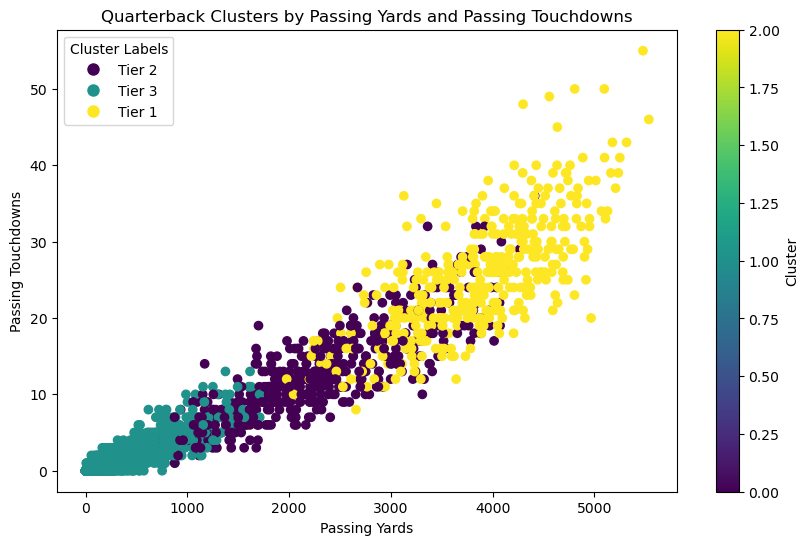

In [2108]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    qb['passing_yards'], 
    qb['passing_tds'], 
    c=qb['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Passing Yards')
plt.ylabel('Passing Touchdowns')
plt.title("Quarterback Clusters by Passing Yards and Passing Touchdowns")

cluster_labels = {0: 'Tier 2', 1: 'Tier 3', 2: 'Tier 1'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / 2), markersize=10) 
           for i in range(len(cluster_labels))]
plt.legend(handles, [cluster_labels[i] for i in sorted(cluster_labels.keys())], title="Cluster Labels")

plt.show()

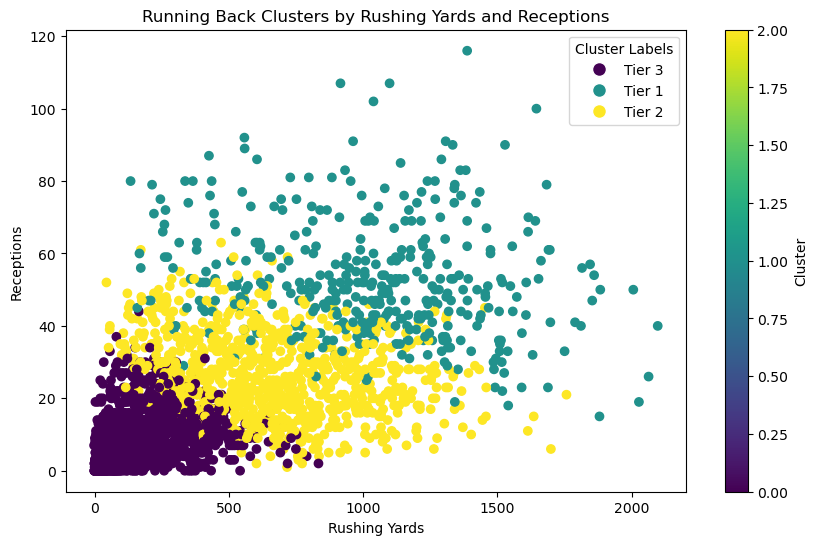

In [2110]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    rb['rushing_yards'], 
    rb['receptions'], 
    c=rb['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Rushing Yards')
plt.ylabel('Receptions')
plt.title("Running Back Clusters by Rushing Yards and Receptions")

# Reorder the legend
cluster_labels = {0: 'Tier 3', 1: 'Tier 1', 2: 'Tier 2'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / 2), markersize=10) 
           for i in range(len(cluster_labels))]
plt.legend(handles, [cluster_labels[i] for i in sorted(cluster_labels.keys())], title="Cluster Labels")

plt.show()

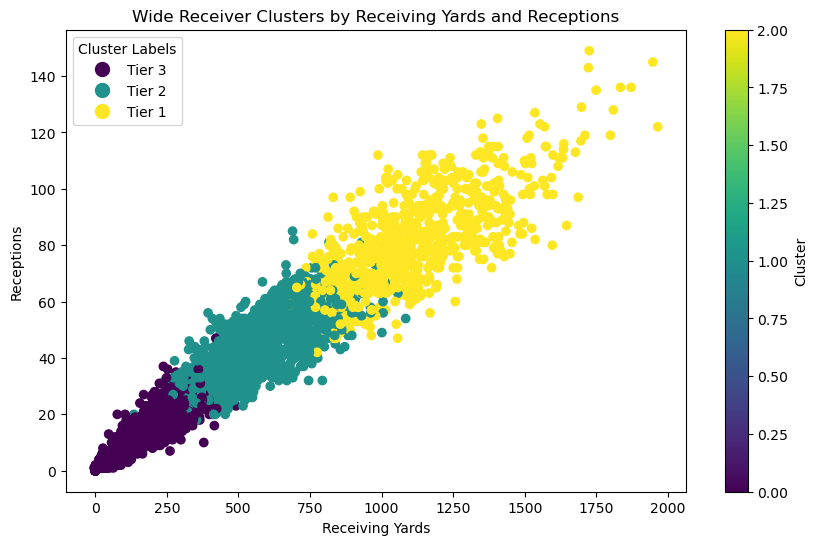

In [2112]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    wr['receiving_yards'], 
    wr['receptions'], 
    c=wr['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Receiving Yards')
plt.ylabel('Receptions')
plt.title("Wide Receiver Clusters by Receiving Yards and Receptions")

cluster_labels = {0: 'Tier 3', 1: 'Tier 2', 2: 'Tier 1'}

handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(i / 2), markersize=10, linestyle='') 
           for i in sorted(cluster_labels.keys())]
plt.legend(handles, [cluster_labels[i] for i in sorted(cluster_labels.keys())], title="Cluster Labels")

plt.show()

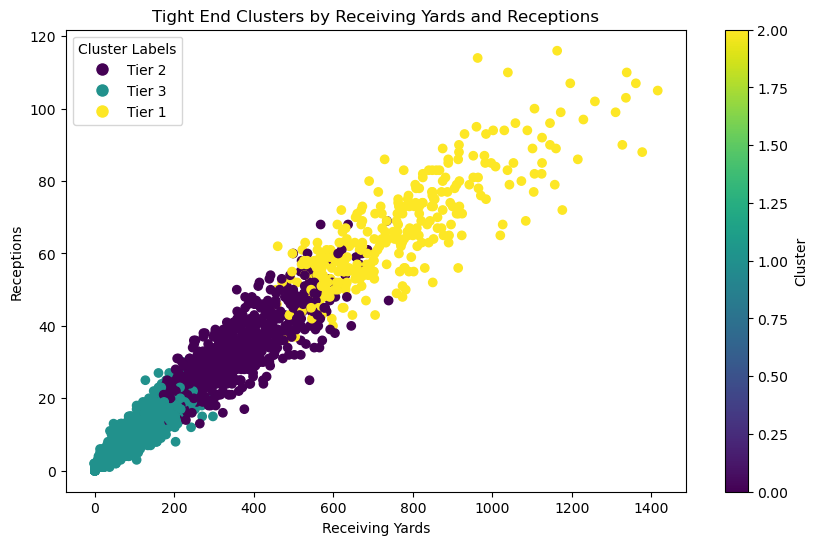

In [2114]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    te['receiving_yards'], 
    te['receptions'], 
    c=te['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Receiving Yards')
plt.ylabel('Receptions')
plt.title("Tight End Clusters by Receiving Yards and Receptions")

cluster_labels = {0: 'Tier 2', 1: 'Tier 3', 2: 'Tier 1'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / 2), markersize=10) 
           for i in range(len(cluster_labels))]
plt.legend(handles, [cluster_labels[i] for i in sorted(cluster_labels.keys())], title="Cluster Labels")

plt.show()

In [2116]:
tier_1_qbs = qb[qb['qb_cluster_labels'] == 'Tier 1']['player_id'].unique()

df_tier_1_qbs = qb[qb['player_id'].isin(tier_1_qbs)]

In [2118]:
tier_1_rbs = rb[rb['rb_cluster_labels'] == 'Tier 1']['player_id'].unique()

df_tier_1_rbs = rb[rb['player_id'].isin(tier_1_rbs)]

In [2329]:
tier_1_wrs = wr[wr['wr_cluster_labels'] == 'Tier 1']['player_id'].unique()

df_tier_1_wrs = wr[wr['player_id'].isin(tier_1_wrs)]

In [2122]:
tier_1_tes = te[te['te_cluster_labels'] == 'Tier 1']['player_id'].unique()

df_tier_1_tes = te[te['player_id'].isin(tier_1_tes)]

In [2124]:
def calculate_streaks(seasons):
    streaks = [len(list(g)) for _, g in groupby(enumerate(seasons), lambda x: x[0] - x[1])]
    return max(streaks) if streaks else 0

In [2126]:
tier_1_qb_seasons = qb[qb['qb_cluster_labels'] == 'Tier 1']

tier_1_qb_seasons['season'] = tier_1_qb_seasons['season'].astype(int)  
tier_1_qb_seasons = tier_1_qb_seasons.sort_values(['player_id', 'season'])

consecutive_tier_1qb = tier_1_qb_seasons.groupby('player_id')['season'].apply(calculate_streaks)

print(f"QB: Average consecutive years: {consecutive_tier_1qb.mean():.2f}")
print(f"QB: Longest streak: {consecutive_tier_1qb.max()} years")

QB: Average consecutive years: 3.47
QB: Longest streak: 15 years


/tmp/ipykernel_1424/214363323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier_1_qb_seasons['season'] = tier_1_qb_seasons['season'].astype(int)


In [2128]:
tier_1_rb_seasons = rb[rb['rb_cluster_labels'] == 'Tier 1']

tier_1_rb_seasons['season'] = tier_1_rb_seasons['season'].astype(int)  
tier_1_rb_seasons = tier_1_rb_seasons.sort_values(['player_id', 'season'])

consecutive_tier_1rb = tier_1_rb_seasons.groupby('player_id')['season'].apply(calculate_streaks)

print(f"RB: Average consecutive years: {consecutive_tier_1rb.mean():.2f}")
print(f"RB: Longest streak: {consecutive_tier_1rb.max()} years")

RB: Average consecutive years: 2.06
RB: Longest streak: 8 years


/tmp/ipykernel_1424/2460569202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier_1_rb_seasons['season'] = tier_1_rb_seasons['season'].astype(int)


In [2335]:
tier_1_wr_seasons = wr[wr['wr_cluster_labels'] == 'Tier 1']

tier_1_wr_seasons['season'] = tier_1_wr_seasons['season'].astype(int)

tier_1_wr_seasons = tier_1_wr_seasons.sort_values(['player_id', 'season'])

consecutive_tier_1wr = tier_1_wr_seasons.groupby('player_id')['season'].apply(calculate_streaks)

print(f"WR: Average consecutive years: {consecutive_tier_1wr.mean():.2f}")
print(f"WR: Longest streak: {consecutive_tier_1wr.max()} years")

WR: Average consecutive years: 2.65
WR: Longest streak: 10 years


/tmp/ipykernel_1424/777279415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier_1_wr_seasons['season'] = tier_1_wr_seasons['season'].astype(int)


In [2132]:
tier_1_te_seasons = te[te['te_cluster_labels'] == 'Tier 1']

tier_1_te_seasons['season'] = tier_1_te_seasons['season'].astype(int)  
tier_1_te_seasons = tier_1_te_seasons.sort_values(['player_id', 'season'])

consecutive_tier_1te = tier_1_te_seasons.groupby('player_id')['season'].apply(calculate_streaks)

print(f"TE: Average consecutive years: {consecutive_tier_1te.mean():.2f}")
print(f"TE: Longest streak: {consecutive_tier_1te.max()} years")

TE: Average consecutive years: 2.52
TE: Longest streak: 15 years


/tmp/ipykernel_1424/506559758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier_1_te_seasons['season'] = tier_1_te_seasons['season'].astype(int)


In [2134]:
qb['qbnext_year_cluster'] = qb.groupby('player_id')['qb_cluster_labels'].shift(-1)

tier_1_qb_transitions = qb[qb['qb_cluster_labels'] == 'Tier 1']
qb_transitions_summary = tier_1_qb_transitions['qbnext_year_cluster'].value_counts(normalize=True) * 100

print("QB: Percentage of transitions after Tier 1 season:")
print(qb_transitions_summary)

QB: Percentage of transitions after Tier 1 season:
Tier 1    66.412214
Tier 2    23.155216
Tier 3    10.432570
Name: qbnext_year_cluster, dtype: float64


/tmp/ipykernel_1424/1653092733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb['qbnext_year_cluster'] = qb.groupby('player_id')['qb_cluster_labels'].shift(-1)


In [2136]:
rb['rbnext_year_cluster'] = rb.groupby('player_id')['rb_cluster_labels'].shift(-1)

tier_1_rb_transitions = rb[rb['rb_cluster_labels'] == 'Tier 1']
rb_transitions_summary = tier_1_rb_transitions['rbnext_year_cluster'].value_counts(normalize=True) * 100

print("RB: Percentage of transitions after Tier 1 season:")
print(rb_transitions_summary)

RB: Percentage of transitions after Tier 1 season:
Tier 1    46.015424
Tier 2    38.303342
Tier 3    15.681234
Name: rbnext_year_cluster, dtype: float64


/tmp/ipykernel_1424/3755355964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb['rbnext_year_cluster'] = rb.groupby('player_id')['rb_cluster_labels'].shift(-1)


In [2341]:
wr['wrnext_year_cluster'] = wr.groupby('player_id')['wr_cluster_labels'].shift(-1)

tier_1_wr_transitions = wr[wr['wr_cluster_labels'] == 'Tier 1']
wr_transitions_summary = tier_1_wr_transitions['wrnext_year_cluster'].value_counts(normalize=True) * 100

print("WR: Percentage of transitions after Tier 1 season:")
print(wr_transitions_summary)

WR: Percentage of transitions after Tier 1 season:
Tier 1    57.180851
Tier 2    33.510638
Tier 3     9.308511
Name: wrnext_year_cluster, dtype: float64


/tmp/ipykernel_1424/835923351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr['wrnext_year_cluster'] = wr.groupby('player_id')['wr_cluster_labels'].shift(-1)


In [2140]:
te['tenext_year_cluster'] = te.groupby('player_id')['te_cluster_labels'].shift(-1)

tier_1_te_transitions = te[te['te_cluster_labels'] == 'Tier 1']
te_transitions_summary = tier_1_te_transitions['tenext_year_cluster'].value_counts(normalize=True) * 100

print("TE: Percentage of transitions after Tier 1 season:")
print(te_transitions_summary)

TE: Percentage of transitions after Tier 1 season:
Tier 1    55.593220
Tier 2    37.966102
Tier 3     6.440678
Name: tenext_year_cluster, dtype: float64


/tmp/ipykernel_1424/1122331751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['tenext_year_cluster'] = te.groupby('player_id')['te_cluster_labels'].shift(-1)


In [2144]:
wr['year_number'] = wr['year_number'].astype(int)

/tmp/ipykernel_1424/2651557990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr['year_number'] = wr['year_number'].astype(int)


In [2147]:
qb_tier_1_year = qb[qb['qb_cluster_labels'] == 'Tier 1']['year_number']
print(f"QB: Average year in NFL during Tier 1 season: {qb_tier_1_year.mean():.2f}")
print(f"QB: Last year in NFL during Tier 1 season: {qb_tier_1_year.max():.2f}")
print(f"QB: Most common year range: {qb_tier_1_year.mode().values}")

rb_tier_1_year = rb[rb['rb_cluster_labels'] == 'Tier 1']['year_number']
print(f"RB: Average year in NFL during Tier 1 season: {rb_tier_1_year.mean():.2f}")
print(f"RB: Last year in NFL during Tier 1 season: {rb_tier_1_year.max():.2f}")
print(f"RB: Most common year range: {rb_tier_1_year.mode().values}")

wr_tier_1_year = wr[wr['wr_cluster_labels'] == 'Tier 1']['year_number']
print(f"WR: Average year in NFL during Tier 1 season: {wr_tier_1_year.mean():.2f}")
print(f"WR: Last year in NFL during Tier 1 season: {wr_tier_1_year.max():.2f}")
print(f"WR: Most common year range: {wr_tier_1_year.mode().values}")

te_tier_1_year = te[te['te_cluster_labels'] == 'Tier 1']['year_number']
print(f"TE: Average year in NFL during Tier 1 season: {te_tier_1_year.mean():.2f}")
print(f"TE: Last year in NFL during Tier 1 season: {te_tier_1_year.max():.2f}")
print(f"TE: Most common year range: {te_tier_1_year.mode().values}")

QB: Average year in NFL during Tier 1 season: 6.66
QB: Last year in NFL during Tier 1 season: 23.00
QB: Most common year range: [2 3]
RB: Average year in NFL during Tier 1 season: 3.85
RB: Last year in NFL during Tier 1 season: 12.00
RB: Most common year range: [2]
WR: Average year in NFL during Tier 1 season: 4.74
WR: Last year in NFL during Tier 1 season: 16.00
WR: Most common year range: [2]
TE: Average year in NFL during Tier 1 season: 5.25
TE: Last year in NFL during Tier 1 season: 16.00
TE: Most common year range: [3]


In [2150]:
tier_1_qb_career = qb[qb['qb_cluster_labels'] == 'Tier 1'].groupby('player_id')['qb_cluster_labels'].count()

total_qb_career = qb.groupby('player_id')['qb_cluster_labels'].count()

percent_tier_1_qb = (tier_1_qb_career / total_qb_career) * 100

total_qbs = qb['player_id'].nunique()
print("")
print(f"QB: Average percentage of career in Tier 1: {percent_tier_1_qb.mean():.2f}%")
print(f"QB: Players with only 1 Tier 1 season: {sum(tier_1_qb_career == 1)} of {total_qbs}")

tier_1_rb_career = rb[rb['rb_cluster_labels'] == 'Tier 1'].groupby('player_id')['rb_cluster_labels'].count()

total_rb_career = rb.groupby('player_id')['rb_cluster_labels'].count()

percent_tier_1_rb = (tier_1_rb_career / total_rb_career) * 100

total_rbs = rb['player_id'].nunique()
print("")
print(f"RB: Average percentage of career in Tier 1: {percent_tier_1_rb.mean():.2f}%")
print(f"RB: Players with only 1 Tier 1 season: {sum(tier_1_rb_career == 1)} of {total_rbs}")

tier_1_wr_career = wr[wr['wr_cluster_labels'] == 'Tier 1'].groupby('player_id')['wr_cluster_labels'].count()

total_wr_career = wr.groupby('player_id')['wr_cluster_labels'].count()

percent_tier_1_wr = (tier_1_wr_career / total_wr_career) * 100

total_wrs = wr['player_id'].nunique()
print("")
print(f"WR: Average percentage of career in Tier 1: {percent_tier_1_wr.mean():.2f}%")
print(f"WR: Players with only 1 Tier 1 season: {sum(tier_1_wr_career == 1)} of {total_wrs}")

tier_1_te_career = te[te['te_cluster_labels'] == 'Tier 1'].groupby('player_id')['te_cluster_labels'].count()

total_te_career = te.groupby('player_id')['te_cluster_labels'].count()

percent_tier_1_te = (tier_1_te_career / total_te_career) * 100

total_tes = te['player_id'].nunique()
print("")
print(f"TE: Average percentage of career in Tier 1: {percent_tier_1_te.mean():.2f}%")
print(f"TE: Players with only 1 Tier 1 season: {sum(tier_1_te_career == 1)} of {total_tes}")


QB: Average percentage of career in Tier 1: 43.18%
QB: Players with only 1 Tier 1 season: 25 of 311

RB: Average percentage of career in Tier 1: 34.14%
RB: Players with only 1 Tier 1 season: 69 of 448

WR: Average percentage of career in Tier 1: 40.21%
WR: Players with only 1 Tier 1 season: 84 of 692

TE: Average percentage of career in Tier 1: 36.23%
TE: Players with only 1 Tier 1 season: 36 of 374


In [2154]:
def calculate_time_to_tier_1(data, cluster_label_column, cluster_label, total_players, position_name):
    tier_1_seasons = data[data[cluster_label_column] == cluster_label].copy()
    
    data['year_number'] = pd.to_numeric(data['year_number'], errors='coerce').dropna().astype(int)
    
    tier_1_min_year = tier_1_seasons.groupby('player_id')['year_number'].min()
    
    first_season = data.groupby('player_id')['year_number'].min()
    
    time_to_tier_1 = (tier_1_min_year - first_season).dropna()
    
    avg_time_to_tier_1 = time_to_tier_1.mean()
    rookies_with_tier_1 = sum(time_to_tier_1 == 0)
    
    print(f"{position_name}: Average time to Tier 1: {avg_time_to_tier_1:.2f} years")
    print(f"{position_name}: Number of rookies with Tier 1 season: {rookies_with_tier_1} of {total_players}")
    print("")
    return time_to_tier_1

positions = {
    "QB": (qb, "qb_cluster_labels"),
    "RB": (rb, "rb_cluster_labels"),
    "WR": (wr, "wr_cluster_labels"),
    "TE": (te, "te_cluster_labels")
}

for position, (data, cluster_label_column) in positions.items():
    total_players = data['player_id'].nunique()
    calculate_time_to_tier_1(data, cluster_label_column, 'Tier 1', total_players, position)


QB: Average time to Tier 1: 1.98 years
QB: Number of rookies with Tier 1 season: 26 of 311

RB: Average time to Tier 1: 1.42 years
RB: Number of rookies with Tier 1 season: 47 of 448

WR: Average time to Tier 1: 1.50 years
WR: Number of rookies with Tier 1 season: 74 of 692

TE: Average time to Tier 1: 1.83 years
TE: Number of rookies with Tier 1 season: 16 of 374



/tmp/ipykernel_1424/220283437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_number'] = pd.to_numeric(data['year_number'], errors='coerce').dropna().astype(int)
/tmp/ipykernel_1424/220283437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_number'] = pd.to_numeric(data['year_number'], errors='coerce').dropna().astype(int)
/tmp/ipykernel_1424/220283437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [2158]:
def calculate_streaks(years):
    streaks = [len(list(g)) for _, g in groupby(enumerate(years), lambda x: x[0] - x[1])]
    return max(streaks) if streaks else 0

In [2161]:
qbtier_1_seasons = qb[qb['qb_cluster_labels'] == 'Tier 1']

qbtier_1_seasons['year_number'] = qbtier_1_seasons['year_number'].astype(int)
qbtier_1_seasons = qbtier_1_seasons.sort_values(['player_id', 'year_number'])

qbstreak_lengths = qbtier_1_seasons.groupby('player_id')['year_number'].apply(calculate_streaks)

qbplayer_names = qb[['player_id', 'player_display_name']].drop_duplicates()
qbstreak_lengths = qbstreak_lengths.reset_index(name='streak_length')
qbstreaks_with_names = qbstreak_lengths.merge(qbplayer_names, on='player_id')

qbtop_10_streaks = qbstreaks_with_names.sort_values(by='streak_length', ascending=False).head(10)

print(qbtop_10_streaks)
print("")

rbtier_1_seasons = rb[rb['rb_cluster_labels'] == 'Tier 1']

rbtier_1_seasons['year_number'] = rbtier_1_seasons['year_number'].astype(int)
rbtier_1_seasons = rbtier_1_seasons.sort_values(['player_id', 'year_number'])

rbstreak_lengths = rbtier_1_seasons.groupby('player_id')['year_number'].apply(calculate_streaks)

rbplayer_names = rb[['player_id', 'player_display_name']].drop_duplicates()
rbstreak_lengths = rbstreak_lengths.reset_index(name='streak_length')
rbstreaks_with_names = rbstreak_lengths.merge(rbplayer_names, on='player_id')

rbtop_10_streaks = rbstreaks_with_names.sort_values(by='streak_length', ascending=False).head(10)

print(rbtop_10_streaks)
print("")

tetier_1_seasons = te[te['te_cluster_labels'] == 'Tier 1']

tetier_1_seasons['year_number'] = tetier_1_seasons['year_number'].astype(int)
tetier_1_seasons = tetier_1_seasons.sort_values(['player_id', 'year_number'])

testreak_lengths = tetier_1_seasons.groupby('player_id')['year_number'].apply(calculate_streaks)

teplayer_names = te[['player_id', 'player_display_name']].drop_duplicates()
testreak_lengths = testreak_lengths.reset_index(name='streak_length')
testreaks_with_names = testreak_lengths.merge(teplayer_names, on='player_id')

tetop_10_streaks = testreaks_with_names.sort_values(by='streak_length', ascending=False).head(10)

print(tetop_10_streaks)
print("")

wrtier_1_seasons = wr[wr['wr_cluster_labels'] == 'Tier 1']

wrtier_1_seasons['year_number'] = wrtier_1_seasons['year_number'].astype(int)
wrtier_1_seasons = wrtier_1_seasons.sort_values(['player_id', 'year_number'])

wrstreak_lengths = wrtier_1_seasons.groupby('player_id')['year_number'].apply(calculate_streaks)

wrplayer_names = wr[['player_id', 'player_display_name']].drop_duplicates()
wrstreak_lengths = wrstreak_lengths.reset_index(name='streak_length')
wrstreaks_with_names = wrstreak_lengths.merge(wrplayer_names, on='player_id')

wrtop_10_streaks = wrstreaks_with_names.sort_values(by='streak_length', ascending=False).head(10)

print(wrtop_10_streaks)
print("")

     player_id  streak_length player_display_name
19  00-0020531             15          Drew Brees
16  00-0019596             14           Tom Brady
29  00-0022942             13       Philip Rivers
28  00-0022924             13  Ben Roethlisberger
52  00-0029263             12      Russell Wilson
40  00-0026143             12           Matt Ryan
60  00-0031280              9          Derek Carr
46  00-0027939              8          Cam Newton
42  00-0026498              8    Matthew Stafford
54  00-0029604              8        Kirk Cousins

      player_id  streak_length  player_display_name
0    00-0000745              8          Tiki Barber
129  00-0033906              8         Alvin Kamara
71   00-0026184              8           Matt Forte
37   00-0020536              8  LaDainian Tomlinson
48   00-0022736              7       Steven Jackson
40   00-0021216              6      Brian Westbrook
54   00-0023564              6       Darren Sproles
59   00-0024275              6   

/tmp/ipykernel_1424/2630327831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbtier_1_seasons['year_number'] = qbtier_1_seasons['year_number'].astype(int)
/tmp/ipykernel_1424/2630327831.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbtier_1_seasons['year_number'] = rbtier_1_seasons['year_number'].astype(int)
/tmp/ipykernel_1424/2630327831.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [2163]:
def calculate_streak_details(seasons, full_data):
    streaks = []
    for _, group in groupby(enumerate(seasons), lambda x: x[0] - x[1]):
        streak = list(group)
        years = [g[1] for g in streak]
        streak_length = len(years)
        start_year = min(years)
        end_year = max(years)
        start_season = full_data.loc[full_data['year_number'] == start_year, 'season'].min()
        end_season = full_data.loc[full_data['year_number'] == end_year, 'season'].max()
        streaks.append((streak_length, start_year, end_year, start_season, end_season))
    if streaks:
        max_streak = max(streaks, key=lambda x: x[0]) 
        return max_streak  
    return (0, None, None, None, None)  

In [2166]:
qb['year_number'] = qb['year_number'].astype(int)
qb['season'] = qb['season'].astype(int)
qbtier_1_seasons = qb[qb['qb_cluster_labels'] == 'Tier 1'].sort_values(['player_id', 'year_number'])

qbstreak_details = qbtier_1_seasons.groupby('player_id').apply(
    lambda group: calculate_streak_details(group['year_number'], group))

qbstreaks_df = qbstreak_details.apply(pd.Series)
qbstreaks_df.columns = ['streak_length', 'start_year', 'end_year', 'start_season', 'end_season']

# Merge with player information
qbplayer_info = qb[['player_id', 'player_display_name']].drop_duplicates()
qbstreaks_df = qbstreaks_df.merge(qbplayer_info, on='player_id')

qbtop_10_streaks = qbstreaks_df.sort_values(by='streak_length', ascending=False).head(10)

rb['year_number'] = rb['year_number'].astype(int)
rb['season'] = rb['season'].astype(int)
rbtier_1_seasons = rb[rb['rb_cluster_labels'] == 'Tier 1'].sort_values(['player_id', 'year_number'])

rbstreak_details = rbtier_1_seasons.groupby('player_id').apply(
    lambda group: calculate_streak_details(group['year_number'], group))

rbstreaks_df = rbstreak_details.apply(pd.Series)
rbstreaks_df.columns = ['streak_length', 'start_year', 'end_year', 'start_season', 'end_season']

# Merge with player information
rbplayer_info = rb[['player_id', 'player_display_name']].drop_duplicates()
rbstreaks_df = rbstreaks_df.merge(rbplayer_info, on='player_id')

rbtop_10_streaks = rbstreaks_df.sort_values(by='streak_length', ascending=False).head(10)

wr['year_number'] = qb['year_number'].astype(int)
wr['season'] = wr['season'].astype(int)
wrtier_1_seasons = wr[wr['wr_cluster_labels'] == 'Tier 1'].sort_values(['player_id', 'year_number'])

wrstreak_details = wrtier_1_seasons.groupby('player_id').apply(
    lambda group: calculate_streak_details(group['year_number'], group))

wrstreaks_df = wrstreak_details.apply(pd.Series)
wrstreaks_df.columns = ['streak_length', 'start_year', 'end_year', 'start_season', 'end_season']

# Merge with player information
wrplayer_info = wr[['player_id', 'player_display_name']].drop_duplicates()
wrstreaks_df = wrstreaks_df.merge(wrplayer_info, on='player_id')

wrtop_10_streaks = wrstreaks_df.sort_values(by='streak_length', ascending=False).head(10)

te['year_number'] = te['year_number'].astype(int)
te['season'] = te['season'].astype(int)
tetier_1_seasons = te[te['te_cluster_labels'] == 'Tier 1'].sort_values(['player_id', 'year_number'])

testreak_details = tetier_1_seasons.groupby('player_id').apply(
    lambda group: calculate_streak_details(group['year_number'], group))

testreaks_df = testreak_details.apply(pd.Series)
testreaks_df.columns = ['streak_length', 'start_year', 'end_year', 'start_season', 'end_season']

# Merge with player information
teplayer_info = te[['player_id', 'player_display_name']].drop_duplicates()
testreaks_df = testreaks_df.merge(teplayer_info, on='player_id')

tetop_10_streaks = testreaks_df.sort_values(by='streak_length', ascending=False).head(10)

/tmp/ipykernel_1424/251004432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb['year_number'] = qb['year_number'].astype(int)
/tmp/ipykernel_1424/251004432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb['season'] = qb['season'].astype(int)
/tmp/ipykernel_1424/251004432.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

player_id                       object
player_display_name             object
season                          object
year_number                      int64
season_type                     object
receptions                       int64
targets                          int64
receiving_yards                  int64
receiving_tds                    int64
receiving_fumbles                int64
receiving_fumbles_lost           int64
receiving_air_yards              int64
receiving_yards_after_catch      int64
receiving_first_downs            int64
receiving_epa                  float64
receiving_2pt_conversions        int64
racr                           float64
target_share                   float64
fantasy_points                 float64
fantasy_points_ppr             float64
cluster                          int32
wr_cluster_labels               object
wrnext_year_cluster             object
dtype: object


In [2168]:
qbtop_10_streaks = qbtop_10_streaks[['player_display_name','start_year','start_season','end_year','end_season','streak_length']]
qbtop_10_streaks

,player_display_name,start_year,start_season,end_year,end_season,streak_length
19,Drew Brees,6,2006,20,2020,15
16,Tom Brady,10,2009,23,2022,14
29,Philip Rivers,5,2008,17,2020,13
28,Ben Roethlisberger,3,2006,15,2018,13
52,Russell Wilson,1,2012,12,2023,12
40,Matt Ryan,3,2010,14,2021,12
60,Derek Carr,2,2015,10,2023,9
46,Cam Newton,1,2011,8,2018,8
42,Matthew Stafford,3,2011,10,2018,8
54,Kirk Cousins,4,2015,11,2022,8


In [2389]:
rbtop_10_streaks = rbtop_10_streaks[['player_display_name','start_year','start_season','end_year','end_season','streak_length']]
rbtop_10_streaks

,player_display_name,start_year,start_season,end_year,end_season,streak_length
0,Tiki Barber,1,1999,8,2006,8
129,Alvin Kamara,1,2017,8,2024,8
71,Matt Forte,1,2008,8,2015,8
37,LaDainian Tomlinson,1,2001,8,2008,8
48,Steven Jackson,2,2005,8,2011,7
40,Brian Westbrook,2,2003,7,2008,6
54,Darren Sproles,3,2008,8,2013,6
59,Maurice Jones-Drew,1,2006,6,2011,6
26,Shaun Alexander,2,2001,6,2005,5
113,Duke Johnson,1,2015,5,2019,5


In [2383]:
wrtop_10_streaks = wrtop_10_streaks[['player_display_name','start_year','start_season','end_year','end_season','streak_length']]
wrtop_10_streaks

,player_display_name,start_year,start_season,end_year,end_season,streak_length
83,Larry Fitzgerald,3.0,2008.0,6.0,2019.0,4.0
47,Laveranues Coles,5.0,2002.0,8.0,2005.0,4.0
26,Derrick Mason,4.0,2010.0,7.0,2005.0,4.0
76,Wes Welker,1.0,2013.0,4.0,2011.0,4.0
86,Braylon Edwards,4.0,2006.0,6.0,2008.0,3.0
35,Terrell Owens,4.0,2000.0,6.0,2001.0,3.0
73,Andre Johnson,2.0,2004.0,4.0,2012.0,3.0
24,Keyshawn Johnson,1.0,2001.0,3.0,2006.0,3.0
54,Steve Smith,1.0,2009.0,3.0,2011.0,3.0
32,Randy Moss,3.0,1999.0,5.0,2002.0,3.0


In [2174]:
tetop_10_streaks = tetop_10_streaks[['player_display_name','start_year','start_season','end_year','end_season','streak_length']]
tetop_10_streaks

,player_display_name,start_year,start_season,end_year,end_season,streak_length
2,Tony Gonzalez,1,1999,15,2013,15
17,Jason Witten,2,2004,16,2019,15
13,Antonio Gates,2,2004,14,2016,13
61,Travis Kelce,1,2014,10,2023,10
57,Zach Ertz,2,2014,7,2019,6
29,Greg Olsen,5,2011,10,2016,6
41,Jared Cook,9,2017,13,2021,5
28,Delanie Walker,8,2013,12,2017,5
85,Mark Andrews,2,2019,6,2023,5
49,Jermaine Gresham,1,2010,5,2014,5


In [2176]:
qbbest_season = qb.loc[qb.groupby('player_id')['fantasy_points'].idxmax()]
qbaverage_year_number = qbbest_season['year_number'].mean()
print(f"Average year_number players have their best season: {qbaverage_year_number:.2f}")
print(qbbest_season[['player_id', 'player_display_name', 'year_number', 'fantasy_points']])

Average year_number players have their best season: 3.09
       player_id       player_display_name  year_number  fantasy_points
1     00-0000104               Troy Aikman            1          167.80
6     00-0000722                Tony Banks            3          136.64
11    00-0000865             Charlie Batch            2          148.66
21    00-0001218           Steve Beuerlein            1          295.02
26    00-0001335                Jeff Blake            1          178.70
...          ...                       ...          ...             ...
2350  00-0038583  Dorian Thompson-Robinson            1           22.10
2354  00-0039150               Bryce Young            1          156.38
2356  00-0039152                Will Levis            1          102.02
2359  00-0039163               C.J. Stroud            1          274.02
2361  00-0039164        Anthony Richardson            1           72.68

[311 rows x 4 columns]


In [2178]:
wrbest_season = wr.loc[wr.groupby('player_id')['fantasy_points'].idxmax()]
wraverage_year_number = wrbest_season['year_number'].mean()
print(f"Average year_number players have their best season: {wraverage_year_number:.2f}")
print(wrbest_season[['player_id', 'player_display_name', 'year_number', 'fantasy_points']])

Average year_number players have their best season: 5.21
       player_id player_display_name  year_number  fantasy_points
1     00-0000145   Derrick Alexander          1.0          185.00
7     00-0000387      Reidel Anthony          4.0           47.20
14    00-0000765       Reggie Barlow          5.0           24.20
21    00-0000869       D'Wayne Bates          1.0           92.90
33    00-0001477        Marty Booker          1.0          160.66
...          ...                 ...          ...             ...
6207  00-0039062      Jonathan Mingo          NaN           41.80
6210  00-0039064         Zay Flowers          NaN          129.40
6213  00-0039067         Rashee Rice          NaN          133.50
6216  00-0039075          Puka Nacua          NaN          193.50
6219  00-0039146         Jayden Reed          NaN          153.20

[692 rows x 4 columns]


In [2180]:
rbbest_season = rb.loc[rb.groupby('player_id')['fantasy_points'].idxmax()]
rbaverage_year_number = rbbest_season['year_number'].mean()
print(f"Average year_number players have their best season: {rbaverage_year_number:.2f}")
print(rbbest_season[['player_id', 'player_display_name', 'year_number', 'fantasy_points']])

Average year_number players have their best season: 2.77
       player_id    player_display_name  year_number  fantasy_points
0     00-0000003  Abdul-Karim al-Jabbar            1            64.7
8     00-0000210            James Allen            2           149.7
12    00-0000232            Terry Allen            1           147.2
18    00-0000279          Kimble Anders            2            50.5
20    00-0000316         Jamal Anderson            2           168.8
...          ...                    ...          ...             ...
4299  00-0039021        Roschon Johnson            1            68.1
4301  00-0039032           Tyjae Spears            1           101.8
4304  00-0039040           Devon Achane            1           163.7
4308  00-0039139           Jahmyr Gibbs            1           190.1
4310  00-0039165        Zach Charbonnet            1            73.1

[448 rows x 4 columns]


In [2182]:
tebest_season = te.loc[te.groupby('player_id')['fantasy_points'].idxmax()]
teaverage_year_number = tebest_season['year_number'].mean()
print(f"Average year_number players have their best season: {teaverage_year_number:.2f}")
print(tebest_season[['player_id', 'player_display_name', 'year_number', 'fantasy_points']])

Average year_number players have their best season: 3.07
       player_id player_display_name  year_number  fantasy_points
2     00-0000166   Stephen Alexander            2            62.0
10    00-0000242         John Allred            2            16.9
13    00-0000883     Marco Battaglia            1            15.3
20    00-0000911         Fred Baxter            3            26.8
24    00-0001281       Eric Bjornson            2            26.9
...          ...                 ...          ...             ...
3368  00-0038996        Tucker Kraft            2            68.0
3370  00-0039041      Elijah Higgins            2            23.6
3375  00-0039065         Sam LaPorta            1           153.3
3377  00-0039066       Michael Mayer            1            44.4
3383  00-0039144       Luke Musgrave            1            41.2

[374 rows x 4 columns]


In [2184]:
qbbest_season = qb.loc[qb.groupby('player_id')['fantasy_points'].idxmax()]

qbbest_season_sorted = qbbest_season.sort_values(by='fantasy_points', ascending=False)

print(qbbest_season_sorted[['player_id', 'player_display_name', 'year_number', 'season','fantasy_points']])


       player_id player_display_name  year_number  season  fantasy_points
2081  00-0033873     Patrick Mahomes            2    2018          417.08
2146  00-0034796       Lamar Jackson            2    2019          415.68
420   00-0010346      Peyton Manning           14    2013          409.98
2169  00-0034857          Josh Allen            4    2021          402.58
1130  00-0023459       Aaron Rodgers            7    2011          397.14
...          ...                 ...          ...     ...             ...
112   00-0003557     Scott Covington            1    1999            0.52
1100  00-0023158        Brock Berlin            1    2007            0.52
2258  00-0036226         Jacob Eason            2    2022            0.36
1318  00-0024824      Matt Gutierrez            2    2009            0.12
316   00-0007832        Bobby Hoying            1    1999            0.10

[311 rows x 5 columns]


In [2186]:
wrbest_season = wr.loc[wr.groupby('player_id')['fantasy_points'].idxmax()]
wrbest_season_sorted = wrbest_season.sort_values(by='fantasy_points', ascending=False)

print(wrbest_season_sorted[['player_id', 'player_display_name', 'year_number', 'season','fantasy_points']])


       player_id player_display_name  year_number  season  fantasy_points
5165  00-0033908         Cooper Kupp          NaN    2021          294.50
645   00-0011754          Randy Moss          9.0    2007          287.30
5856  00-0036358         CeeDee Lamb          NaN    2023          270.20
2554  00-0025389      Calvin Johnson          NaN    2011          263.70
5710  00-0035719        Deebo Samuel          NaN    2021          261.96
...          ...                 ...          ...     ...             ...
63    00-0001842        Macey Brooks          3.0    2000           21.60
136   00-0003175            Mac Cody          3.0    2000           21.20
1349  00-0020425       Ken-Yon Rambo          3.0    2002           21.10
897   00-0015959        Kevin Swayne         14.0    2001           20.30
5733  00-0036133        James Proche          NaN    2021           20.20

[692 rows x 5 columns]


In [2188]:
tebest_season = te.loc[te.groupby('player_id')['fantasy_points'].idxmax()]
tebest_season_sorted = tebest_season.sort_values(by='fantasy_points', ascending=False)

print(tebest_season_sorted[['player_id', 'player_display_name', 'year_number', 'season','fantasy_points']])

       player_id player_display_name  year_number  season  fantasy_points
1773  00-0027656      Rob Gronkowski            2    2011          240.90
1816  00-0027696        Jimmy Graham            4    2013          217.50
2306  00-0030506        Travis Kelce            7    2020          207.76
2984  00-0034753        Mark Andrews            4    2021          194.10
1283  00-0024221        Vernon Davis            4    2009          174.50
...          ...                 ...          ...     ...             ...
2561  00-0032120       Neal Sterling            1    2016           11.00
3192  00-0036424      Brycen Hopkins            2    2022           10.90
2093  00-0029414       Orson Charles            1    2012           10.10
1886  00-0027819     Dorin Dickerson            2    2012            8.90
2079  00-0029218       David Paulson            2    2013            8.20

[374 rows x 5 columns]


In [2190]:
rbbest_season = rb.loc[rb.groupby('player_id')['fantasy_points'].idxmax()]
rbbest_season_sorted = rbbest_season.sort_values(by='fantasy_points', ascending=False)

print(rbbest_season_sorted[['player_id', 'player_display_name', 'year_number', 'season','fantasy_points']])

       player_id  player_display_name  year_number  season  fantasy_points
1041  00-0020536  LaDainian Tomlinson            6    2006           425.1
212   00-0005092       Marshall Faulk            2    2000           374.5
312   00-0007661        Priest Holmes            5    2003           371.0
818   00-0019647      Shaun Alexander            6    2005           361.8
3440  00-0033280  Christian McCaffrey            3    2019           355.2
...          ...                  ...          ...     ...             ...
4257  00-0038098        Pierre Strong            2    2023            37.8
4279  00-0038611      Chris Rodriguez            1    2023            35.9
3398  00-0032975    Jonathan Williams            3    2019            35.4
3912  00-0035567       Craig Reynolds            2    2021            28.2
3200  00-0031959        Marcus Murphy            4    2018            27.6

[448 rows x 5 columns]


In [2192]:
qbtop_25 = qbbest_season_sorted[['player_display_name', 'year_number', 'season','passing_yards','passing_tds','qb_cluster_labels']].head(10)
qbtop_25

,player_display_name,year_number,season,passing_yards,passing_tds,qb_cluster_labels
2081,Patrick Mahomes,2,2018,5097,50,Tier 1
2146,Lamar Jackson,2,2019,3127,36,Tier 1
420,Peyton Manning,14,2013,5477,55,Tier 1
2169,Josh Allen,4,2021,4407,36,Tier 1
1130,Aaron Rodgers,7,2011,4636,45,Tier 1
782,Drew Brees,11,2011,5535,46,Tier 1
644,Tom Brady,8,2007,4806,50,Tier 1
1589,Cam Newton,5,2015,3837,35,Tier 1
2266,Justin Herbert,2,2021,5014,38,Tier 1
2201,Kyler Murray,2,2020,3971,26,Tier 1


In [2194]:
rbtop_25 = rbbest_season_sorted[['player_display_name', 'year_number', 'season','rushing_yards','rushing_tds','rb_cluster_labels']].head(10)
rbtop_25

,player_display_name,year_number,season,rushing_yards,rushing_tds,rb_cluster_labels
1041,LaDainian Tomlinson,6,2006,1815,28,Tier 1
212,Marshall Faulk,2,2000,1341,18,Tier 1
312,Priest Holmes,5,2003,1420,27,Tier 1
818,Shaun Alexander,6,2005,1880,27,Tier 1
3440,Christian McCaffrey,3,2019,1387,15,Tier 1
2042,Chris Johnson,2,2009,2006,14,Tier 1
269,Ahman Green,5,2003,1883,15,Tier 1
4018,Jonathan Taylor,2,2021,1811,18,Tier 1
1316,Larry Johnson,4,2006,1789,17,Tier 1
3250,David Johnson,2,2016,1239,16,Tier 1


In [2196]:
wrtop_25 = wrbest_season_sorted[['player_display_name', 'year_number', 'season','receiving_yards','receiving_tds','wr_cluster_labels']].head(10)
wrtop_25

,player_display_name,year_number,season,receiving_yards,receiving_tds,wr_cluster_labels
5165,Cooper Kupp,NaN,2021,1947,16,Tier 1
645,Randy Moss,9.0,2007,1493,23,Tier 1
5856,CeeDee Lamb,NaN,2023,1749,12,Tier 1
2554,Calvin Johnson,NaN,2011,1686,16,Tier 1
5710,Deebo Samuel,NaN,2021,1405,6,Tier 1
3350,Antonio Brown,NaN,2014,1698,13,Tier 1
4916,Tyreek Hill,NaN,2023,1799,13,Tier 1
4401,Davante Adams,NaN,2020,1374,18,Tier 1
344,Marvin Harrison,NaN,2001,1524,15,Tier 1
393,Torry Holt,5.0,2003,1696,12,Tier 1


In [2198]:
tetop_25 = tebest_season_sorted[['player_display_name', 'year_number', 'season','receiving_yards','receiving_tds','te_cluster_labels']].head(10)
tetop_25

,player_display_name,year_number,season,receiving_yards,receiving_tds,te_cluster_labels
1773,Rob Gronkowski,2,2011,1327,17,Tier 1
1816,Jimmy Graham,4,2013,1215,16,Tier 1
2306,Travis Kelce,7,2020,1416,11,Tier 1
2984,Mark Andrews,4,2021,1361,9,Tier 1
1283,Vernon Davis,4,2009,965,13,Tier 1
920,Antonio Gates,2,2004,964,13,Tier 1
1059,Dallas Clark,7,2009,1106,10,Tier 1
2492,Darren Waller,5,2020,1196,9,Tier 1
2735,George Kittle,2,2018,1377,5,Tier 1
204,Tony Gonzalez,2,2000,1160,9,Tier 1


In [2200]:
qbaverage_peak_year_number = qbbest_season_sorted['year_number'].mean()

print(f"QB: Average peak year_number: {qbaverage_peak_year_number:.2f}")
print("")

rbaverage_peak_year_number = rbbest_season_sorted['year_number'].mean()

print(f"RB: Average peak year_number: {rbaverage_peak_year_number:.2f}")
print("")
wraverage_peak_year_number = wrbest_season_sorted['year_number'].mean()

# Display the result
print(f"WR: Average peak year_number: {wraverage_peak_year_number:.2f}")
print("")
teaverage_peak_year_number = tebest_season_sorted['year_number'].mean()

# Display the result
print(f"TE: Average peak year_number: {teaverage_peak_year_number:.2f}")
print("")

QB: Average peak year_number: 3.09

RB: Average peak year_number: 2.77

WR: Average peak year_number: 5.21

TE: Average peak year_number: 3.07



In [2202]:
qbtier_1_seasons = qb[qb['qb_cluster_labels'] == 'Tier 1']

qbtier_1_counts = qbtier_1_seasons.groupby('player_id')['qb_cluster_labels'].count()

qbtier_1_years = qbtier_1_seasons.groupby('player_id')['year_number'].agg(['min', 'max']).reset_index()
qbtier_1_years.rename(columns={'min': 'first_tier_1_year', 'max': 'last_tier_1_year'}, inplace=True)

qbtotal_seasons_played = qb.groupby('player_id')['year_number'].nunique().reset_index()
qbtotal_seasons_played.rename(columns={'year_number': 'total_seasons_played'}, inplace=True)

qbplayer_info = qb[['player_id', 'player_display_name']].drop_duplicates()
qbtier_1_counts_df = (
    qbtier_1_counts.reset_index(name='tier_1_season_count')
    .merge(qbplayer_info, on='player_id')
    .merge(qbtier_1_years, on='player_id', how='left')
    .merge(qbtotal_seasons_played, on='player_id')
)

qbtop_tier_1_players = qbtier_1_counts_df.sort_values(by='tier_1_season_count', ascending=False)
qbtop_tier_1_players = qbtop_tier_1_players[['player_display_name', 'tier_1_season_count', 'total_seasons_played', 'first_tier_1_year', 'last_tier_1_year']]
qbtop_tier_1_players = qbtop_tier_1_players.head(10)

qbtop_tier_1_players

,player_display_name,tier_1_season_count,total_seasons_played,first_tier_1_year,last_tier_1_year
16,Tom Brady,16,23,7,23
28,Ben Roethlisberger,15,18,3,18
19,Drew Brees,15,20,6,20
29,Philip Rivers,14,17,3,17
31,Aaron Rodgers,13,20,4,18
40,Matt Ryan,13,15,1,14
52,Russell Wilson,12,13,1,12
10,Peyton Manning,11,16,2,15
42,Matthew Stafford,11,16,3,15
60,Derek Carr,9,11,2,10


In [2204]:
rbtier_1_seasons = rb[rb['rb_cluster_labels'] == 'Tier 1']

rbtier_1_counts = rbtier_1_seasons.groupby('player_id')['rb_cluster_labels'].count()

rbtier_1_years = rbtier_1_seasons.groupby('player_id')['year_number'].agg(['min', 'max']).reset_index()
rbtier_1_years.rename(columns={'min': 'first_tier_1_year', 'max': 'last_tier_1_year'}, inplace=True)

rbtotal_seasons_played = rb.groupby('player_id')['year_number'].nunique().reset_index()
rbtotal_seasons_played.rename(columns={'year_number': 'total_seasons_played'}, inplace=True)

rbplayer_info = rb[['player_id', 'player_display_name']].drop_duplicates()
rbtier_1_counts_df = (
    rbtier_1_counts.reset_index(name='tier_1_season_count')
    .merge(rbplayer_info, on='player_id')
    .merge(rbtier_1_years, on='player_id', how='left')
    .merge(rbtotal_seasons_played, on='player_id')
)

rbtop_tier_1_players = rbtier_1_counts_df.sort_values(by='tier_1_season_count', ascending=False)
rbtop_tier_1_players = rbtop_tier_1_players[['player_display_name', 'tier_1_season_count', 'total_seasons_played', 'first_tier_1_year', 'last_tier_1_year']]
rbtop_tier_1_players = rbtop_tier_1_players.head(10)

rbtop_tier_1_players

,player_display_name,tier_1_season_count,total_seasons_played,first_tier_1_year,last_tier_1_year
37,LaDainian Tomlinson,9,11,1,10
0,Tiki Barber,8,8,1,8
129,Alvin Kamara,8,8,1,8
71,Matt Forte,8,10,1,8
48,Steven Jackson,7,12,2,8
56,Reggie Bush,7,11,1,8
80,LeSean McCoy,7,12,2,9
38,Clinton Portis,6,9,1,7
59,Maurice Jones-Drew,6,9,1,6
11,Edgerrin James,6,11,1,7


In [2395]:
wrtier_1_seasons = wr[wr['wr_cluster_labels'] == 'Tier 1']

wrtier_1_counts = wrtier_1_seasons.groupby('player_id')['wr_cluster_labels'].count()

wrtier_1_years = wrtier_1_seasons.groupby('player_id')['year_number'].agg(['min', 'max']).reset_index()
wrtier_1_years.rename(columns={'min': 'first_tier_1_year', 'max': 'last_tier_1_year'}, inplace=True)

wrtotal_seasons_played = wr.groupby('player_id')['year_number'].nunique().reset_index()
wrtotal_seasons_played.rename(columns={'year_number': 'total_seasons_played'}, inplace=True)

wrplayer_info = wr[['player_id', 'player_display_name']].drop_duplicates()
wrtier_1_counts_df = (
    wrtier_1_counts.reset_index(name='tier_1_season_count')
    .merge(wrplayer_info, on='player_id')
    .merge(wrtier_1_years, on='player_id', how='left')
    .merge(wrtotal_seasons_played, on='player_id')
)

wrtop_tier_1_players = wrtier_1_counts_df.sort_values(by='tier_1_season_count', ascending=False)
wrtop_tier_1_players = wrtop_tier_1_players[['player_display_name', 'tier_1_season_count', 'total_seasons_played', 'first_tier_1_year', 'last_tier_1_year']]
wrtop_tier_1_players = wrtop_tier_1_players.head(10)

wrtop_tier_1_players

,player_display_name,tier_1_season_count,total_seasons_played,first_tier_1_year,last_tier_1_year
83,Larry Fitzgerald,12,17,2,16
74,Anquan Boldin,10,14,1,12
171,Mike Evans,10,11,1,10
35,Terrell Owens,10,12,2,12
54,Steve Smith,10,16,3,16
61,Reggie Wayne,9,14,4,12
73,Andre Johnson,9,14,2,12
45,Hines Ward,9,13,3,11
32,Randy Moss,9,13,1,11
26,Derrick Mason,9,13,3,12


In [2208]:
tetier_1_seasons = te[te['te_cluster_labels'] == 'Tier 1']

tetier_1_counts = tetier_1_seasons.groupby('player_id')['te_cluster_labels'].count()

tetier_1_years = tetier_1_seasons.groupby('player_id')['year_number'].agg(['min', 'max']).reset_index()
tetier_1_years.rename(columns={'min': 'first_tier_1_year', 'max': 'last_tier_1_year'}, inplace=True)

tetotal_seasons_played = te.groupby('player_id')['year_number'].nunique().reset_index()
tetotal_seasons_played.rename(columns={'year_number': 'total_seasons_played'}, inplace=True)

teplayer_info = te[['player_id', 'player_display_name']].drop_duplicates()
tetier_1_counts_df = (
    tetier_1_counts.reset_index(name='tier_1_season_count')
    .merge(teplayer_info, on='player_id')
    .merge(tetier_1_years, on='player_id', how='left')
    .merge(tetotal_seasons_played, on='player_id')
)

tetop_tier_1_players = tetier_1_counts_df.sort_values(by='tier_1_season_count', ascending=False)
tetop_tier_1_players = tetop_tier_1_players[['player_display_name', 'tier_1_season_count', 'total_seasons_played', 'first_tier_1_year', 'last_tier_1_year']]
tetop_tier_1_players = tetop_tier_1_players.head(10)

tetop_tier_1_players

,player_display_name,tier_1_season_count,total_seasons_played,first_tier_1_year,last_tier_1_year
2,Tony Gonzalez,15,15,1,15
17,Jason Witten,15,17,2,16
13,Antonio Gates,13,16,2,14
61,Travis Kelce,10,11,1,10
43,Rob Gronkowski,9,11,1,11
29,Greg Olsen,8,14,2,10
45,Jimmy Graham,8,13,2,11
41,Jared Cook,8,13,3,13
57,Zach Ertz,7,12,2,9
24,Vernon Davis,6,14,2,12


**How long on average can players be considered 'Tier 1'?**

There was a minimum criteria set for each position group, either a minimum number of years played or level of performance.

**Theoretical explanation: What kind of machine learning problems these are and why you are using a particular technique/algorithm. [20 points]**
<br>
To evaluate how long we can anticipate a Tier 1 player sustaining a high level of play, we first needed to define "Tier 1" performance. This involved grouping players into performance-based categories (Tier 1, Tier 2, Tier 3) using K-Means, an unsupervised machine learning algorithm.
<br><br>
**Why K-Means?**
<br><br>
K-Means is a clustering algorithm that groups data points (in this case, player seasons) into distinct clusters based on their similarity. It is particularly well-suited for this problem because:<br>
<br>
**No Predefined Labels:** The data did not come with predefined labels for Tier 1, Tier 2, or Tier 3. Clustering allows us to explore the underlying structure of the data.<br>
**Multi-Dimensional Features:** Player performance is characterized by multiple numerical metrics (e.g., rushing yards, receptions, fantasy points). K-Means can handle these high-dimensional datasets effectively by minimizing the variance within each cluster.<br>
**Scalability:** K-Means is computationally efficient for large datasets, making it appropriate for the NFL dataset, which spans multiple players and seasons.<br>
**How K-Means Was Used**
<br>
**Feature Selection and Scaling:**
<br>
Features such as rushing *yards, receptions, and fantasy points* were selected to represent player performance.
These features were standardized using *StandardScaler* to ensure that all metrics contributed equally to the clustering process.<br>
**Defining Clusters:**
<br>
K-Means grouped player seasons into three clusters based on the performance metrics.<br>
The resulting clusters were labeled as **Tier 1** (elite performance), **Tier 2** (above-average performance), and **Tier 3** (average or below-average performance).<br>
**Assigning Tiers:**
<br>
Each player's season was classified into one of the three tiers, providing a framework for further analysis.
Pattern Analysis After Clustering<br>
**Once the tiers were assigned:**
<br>
**Longevity Analysis:** We investigated how long players typically sustain Tier 1 performance by calculating streak lengths and time-to-Tier 1 for each player.<br>
**Position-Specific Trends:** Patterns were analyzed separately for different position groups (e.g., quarterbacks, running backs, wide receivers, and tight ends) to identify unique trends.

**Practical explanation: The importance of this topic/phenomena in society, technology, and/or business area. [20 points]**
<br>
<br>
The NFL is a multi-billion-dollar industry with a global fan base exceeding 100 million. As one of the most lucrative sports leagues, the NFL generates revenue from broadcast deals, sponsorships, merchandise, and ticket sales. Amid this financial landscape, player contracts have reached unprecedented heights, with some athletes signing deals approaching $500 million. These figures underscore the critical need for data-driven decision-making to evaluate and maximize player value.
<br><br>
**Significance in the NFL**<br><br>
In-depth analytics and cutting-edge algorithms have become integral to NFL operations, addressing various challenges:
<br><br>
**Player Performance Prediction:**
<br><br>
Teams rely on advanced metrics to evaluate current players and prospects, predicting future performance to justify high-value contracts.
Metrics such as speed, durability, and situational effectiveness are quantified to assess a player's potential impact.<br>
**Injury Prevention:**
<br><br>
Machine learning models analyze player biomechanics and game conditions to minimize injury risks, prolonging careers and protecting investments.<br><br>
**Game Strategy:**
<br><br>
Coaches use data to optimize play-calling, defensive schemes, and player matchups, increasing the team's competitive edge.<br>
**Fan Engagement:**
<br><br>
Teams leverage analytics to personalize fan experiences, from dynamic ticket pricing to targeted marketing, boosting engagement and revenue.<br>
**Impact of Fantasy Football**<br><br>
One of the driving forces behind the NFL's popularity is the Fantasy Football phenomenon. With millions of participants worldwide, Fantasy Football transforms fans into virtual general managers, drafting and managing teams based on real-world player performance. This has significant implications:
<br><br>
**Predictive Analytics in Fantasy Football:**
<br><br>
Platforms use machine learning models to forecast player performance, helping users make informed decisions about drafts, trades, and weekly lineups.
Metrics such as projected fantasy points, matchup difficulty, and injury probabilities are computed in real-time.<br>
**Engagement and Revenue Generation:**
<br><br>
Fantasy Football deepens fan involvement by encouraging weekly engagement, viewership, and content consumption.
The phenomenon drives significant ad revenue for platforms and broadcasters, as fans track games and stats more closely.<br>
**Technology Adoption:**
<br><br>
The popularity of Fantasy Football has spurred the development of advanced data visualization tools, APIs, and platforms that provide real-time stats and predictive insights.<br>
It fosters innovation in sports analytics, benefiting not just fantasy players but also teams and coaches.<br>
**Broader Implications**<br>
The intersection of sports, analytics, and business extends beyond the NFL:
<br><br>
**Innovation in Technology:**
<br><br>
Sports analytics drives advancements in AI, machine learning, and big data, with applications in other industries like healthcare and finance.
Techniques used for injury prediction or performance forecasting in sports are adapted to workplace safety and employee productivity.<br>
**Cultural Impact:**
<br><br>
The NFL and Fantasy Football create a shared cultural experience, bringing diverse communities together and enhancing the global appeal of American football.<br>
**Business Opportunities:**
<br><br>
The demand for actionable insights creates opportunities for startups and data scientists to build tools that enhance decision-making in sports and beyond.

**The comprehensiveness of data processing and computation. [20 points]**<br><br>
The project employed extensive data processing and computational techniques to analyze NFL player performance and career trajectories. The goal was to uncover insights about Tier 1 status and career dynamics across various positions.
<br><br>
**1. Data Preparation**<br>
**Data Cleaning:**<br>
Removed players with incomplete career data or insufficient game participation (e.g., fewer than two seasons played or no seasons exceeding a performance threshold).<br>
Standardized data formats, such as converting seasons to integers and aligning year numbers with performance metrics.<br>
**Feature Selection:**<br>
Selected key metrics for analysis, including receptions, rushing yards, passing yards, and fantasy points.
Differentiated between regular-season and postseason performances to provide granular insights.<br><br>
**2. Clustering with K-Means**<br>
**Purpose:**<br>
Grouped player seasons into Tier 1 (elite), Tier 2 (above average), and Tier 3 (average or below average) clusters.<br>
**Methodology:**<br>
Standardized features to ensure uniform contribution across metrics.<br>
Applied K-Means clustering to assign each player season to a performance tier.<br>
**Output:**<br>
Cluster assignments provided the foundation for analyzing patterns in player performance, transitions between tiers, and longevity.<br><br>
**3. Career Analysis**<br>
**Time to Tier 1:**<br>
Calculated the number of years it took for a player to reach Tier 1 status after entering the NFL, using year_number as a temporal variable.<br>
Compared this across positions to identify trends (e.g., quarterbacks typically require more time than running backs).<br>
**Tier 1 Longevity:**<br>
Evaluated consecutive Tier 1 streaks using streak detection algorithms.<br>
Identified the longest streaks and average streak lengths for players by position.<br>
**Career Longevity and Tier 1 Proportion:**<br>
Measured total seasons played and calculated the proportion of a player's career spent in Tier 1.<br>
Determined players with the highest and lowest Tier 1 proportions.<br><br>
**4. Descriptive and Comparative Statistics**<br>
**Career Trajectories:**<br>
Identified the average year in which players achieve their peak performance, providing insight into the career arc for different positions.<br>
**Cluster Transitions:**<br>
Analyzed transitions between tiers (e.g., Tier 1 → Tier 2 or Tier 3) to understand how performance evolves over time.<br>
**Position-Specific Trends:**<br>
Segmented analyses by position (e.g., quarterbacks, running backs, wide receivers, tight ends) to account for positional differences in performance metrics.<br><br>
**5. Computational Techniques**<br>
**Groupby Operations:** Used extensively to compute metrics like average performance, streaks, and year-to-Tier 1.<br>
Aggregation Functions: Employed for summing, averaging, and ranking seasonal data.<br>
**Custom Algorithms:**<br>
Developed streak detection logic to calculate consecutive Tier 1 seasons.<br>
Created methods to identify the first and last Tier 1 seasons for each player.<br>
**Scalable Framework:**<br>
Ensured analyses could handle large datasets spanning decades of NFL data.<br>
**Conclusion**<br>
Through comprehensive data processing and computational techniques, the project provided actionable insights into the timing, duration, and significance of Tier 1 performance across NFL positions. This level of analysis not only enhances understanding of player trajectories but also demonstrates the value of advanced analytics in sports management and strategy.